<a href="https://colab.research.google.com/github/linconsarker/machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Salary_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
del df["Unnamed: 0"]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'Salary')

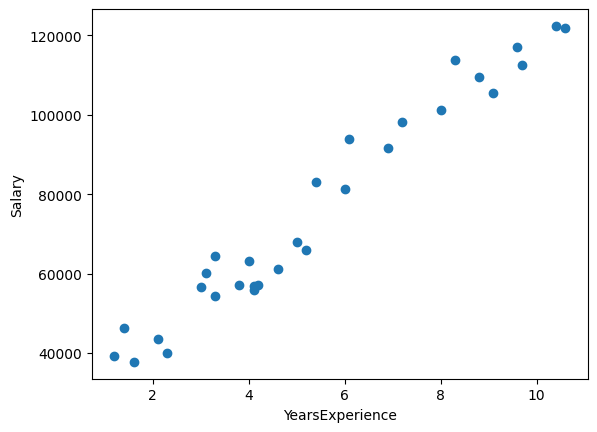

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
import seaborn as sns

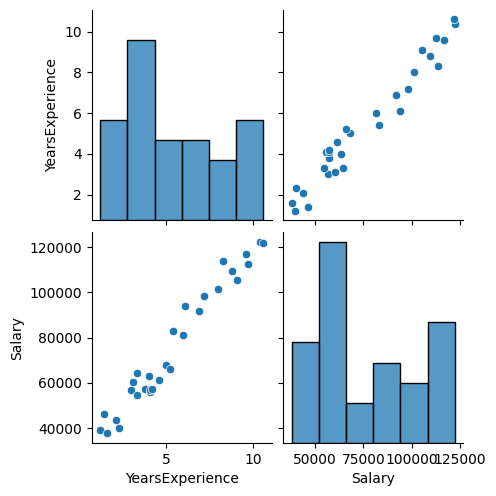

In [ ]:
sns.pairplot(df)

In [ ]:
# dependent and independent variable

X = df[["YearsExperience"]]
y = df["Salary"]

In [ ]:
print(f"No. of points : {X.shape[0]}")

No. of points : 30


# train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(22, 1)

In [ ]:
y_train.shape

(22,)

# standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

Here, the X_train was fit_transform was used to ensure that mean and median will be calculated but not for X_test. This is done to prevent data leakage, which means to prevent the test data not to learn anything other than given info.

In [ ]:
X_test = scaler.transform(X_test)

# apply linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Slope or coefficient : {regression.coef_}")
print(f"Intercept : {regression.intercept_}")

Slope or coefficient : [25063.1519945]
Intercept : 70417.40909090909


In [ ]:
intercept = "%.2f" % regression.intercept_
slope = "%.2f" % regression.coef_[0]

print(f"Equation is the 'y = {slope} x + {intercept}'.")

Equation is the 'y = 25063.15 x + 70417.41'.


Text(0, 0.5, 'y_train')

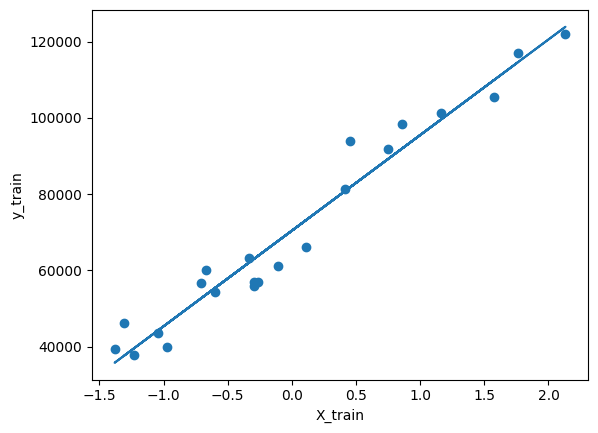

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.xlabel("X_train")
plt.ylabel("y_train")

# prediction for test data

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")

mae = 5056.9954666635895
mse = 38802588.99247059
rmse = 6229.172416338352


# R Square

R^2 = 1 - SSR/SST

R^2 = coefficient of determination <br>
SSR = sum of squares of residuals <br>
SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, y_pred)

score = float("%.2f" % score)

print(f"R^2 score = {score}")

R^2 score = 0.93


# Adjusted R^2

Adjusted R^2 = 1 - [(1-R^2)^(n-1)/(n-k-1)]

R^2 = the R^2 of the model <br>
n = the number of observations <br>
k = the number of predictor variables


In [ ]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[0]-1)

1.4899999999999998

# OLS Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[ 45023.47271018    979.6971356   31904.0501986    4728.10356748
 -14951.03019988 -10265.52216003  51583.18396597  36589.55823845]


In [ ]:
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001ED239C9460>>


the below prediction is made and transformed to ensure that the output value is in the range of input.

In [ ]:
regression.predict(scaler.transform([[72]]))

C:\Users\lasit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([699255.18356619])